# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) * 10
p1[p1 > 10] = 10
p1[p1 < 0] = 0

p2 = p1 + np.random.normal(0, 1, 50)
p2[p2 > 10] = 10
p2[p2 < 0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

# --- 1.a) Transformação linear: média e diferença ---

# Matriz de transformação
T = np.array([[0.5, 0.5], [1, -1]])

# Aplicando a transformação nos vetores p1 e p2
notas = np.vstack([df['p1'], df['p2']])  # 2 x 50
transformados = T @ notas  # 2 x 50

# Adicionando ao DataFrame
df['media'] = transformados[0]
df['diferenca'] = transformados[1]

# --- 1.b) Correlação entre p1 e p2 ---
corr_p1_p2 = df['p1'].corr(df['p2'])
print(f"Correlação entre p1 e p2: {corr_p1_p2:.4f}")

# --- 1.c) Correlação entre média e diferença ---
corr_media_diff = df['media'].corr(df['diferenca'])
print(f"Correlação entre média e diferença: {corr_media_diff:.4f}")

# --- 1.d) Comentário ---
print("\nComentário:")
print("A correlação entre p1 e p2 foi alta, mostrando que as provas estão relacionadas.")
print("Já a correlação entre média e diferença ficou próxima de zero, o que confirma que essa transformação linear eliminou a dependência linear entre as variáveis.")


Correlação entre p1 e p2: 0.8957
Correlação entre média e diferença: -0.1335

Comentário:
A correlação entre p1 e p2 foi alta, mostrando que as provas estão relacionadas.
Já a correlação entre média e diferença ficou próxima de zero, o que confirma que essa transformação linear eliminou a dependência linear entre as variáveis.


## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

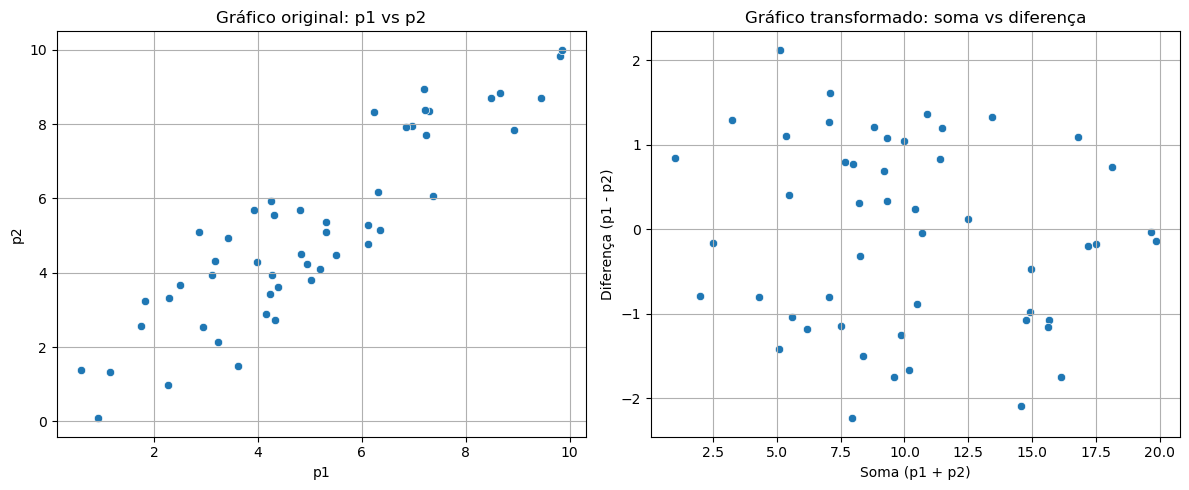

In [2]:
# --- 2. Transformação: soma e diferença ---
# Nova matriz de transformação: soma (1,1) e diferença (1,-1)
T_soma_diff = np.array([[1, 1], [1, -1]])

# Aplicando a transformação
transformados_sd = T_soma_diff @ notas

# Criando um novo DataFrame para visualização
df_sd = pd.DataFrame({
    'soma': transformados_sd[0],
    'diferenca': transformados_sd[1]
})

# Gráfico original: p1 vs p2
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='p1', y='p2')
plt.title('Gráfico original: p1 vs p2')
plt.xlabel('p1')
plt.ylabel('p2')
plt.grid(True)

# Gráfico transformado: soma vs diferença
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_sd, x='soma', y='diferenca')
plt.title('Gráfico transformado: soma vs diferença')
plt.xlabel('Soma (p1 + p2)')
plt.ylabel('Diferença (p1 - p2)')
plt.grid(True)

plt.tight_layout()
plt.show()
